### 레버리지

- 레버리지(leverage)는 실제 종속변수값 y가 예측치 y^에 미치는 영향을 나타낸 값이다.

- y^ = Hy

- H 를 영향도 행렬(influence matrix) 또는 hat 행렬 이라고 한다.
 
- 레버리지는 수학적으로 영향도 행렬의 대각성분 $h_ii$ 으로 정의된다. 즉 레버리지는 실제의 결과값 $y_i$이 예측값 $y^_i$에 미치는 영향, 즉 예측점을 자기 자신의 위치로 끌어당기는 정도를 나타낸 것.


In [6]:
import pandas as pd
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.61e-61
Time:                        14:37:42   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyp

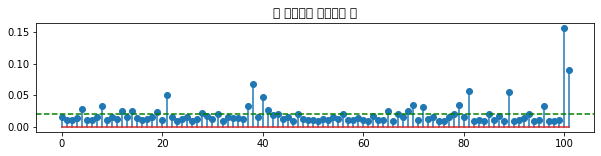

In [7]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10,2))
plt.stem(hat)
plt.axhline(0.02, c='g', ls='--')
plt.title('각 데이터의 레버리지 값')
plt.show()

In [8]:
hat.sum()

2.0000000000000004

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50752 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53944 missing from c

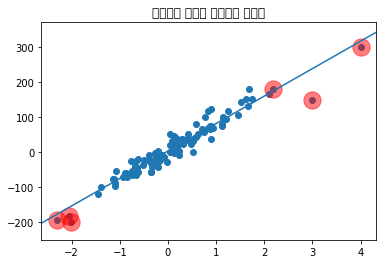

In [10]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
plt.title("회귀분석 결과와 레버리지 포인트")
plt.show()

위 그림에서 데이터가 무리지어 있지 않고 단독으로 존재할수록 레버리지가 커짐을 알 수 있다.

### 레버리지의 영향

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45458 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45716 missing from c

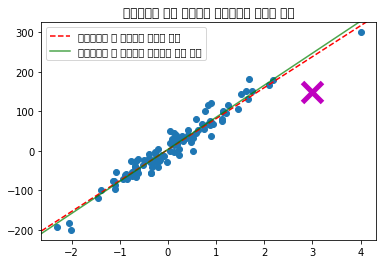

In [11]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result2,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-1], y[-1], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 큰 데이터를 포함한 경우", u"레버리지가 큰 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지가 높은 데이터가 회귀분석에 미치는 영향")
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 51089 missing from current font.
  font.set_text(s, 0, flags=flags)


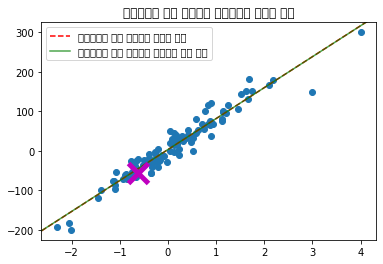

In [12]:
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result3,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[0], y[0], marker='x', c="m", ms=20, mew=5)
plt.legend([u"레버리지가 작은 데이터를 포함한 경우", u"레버리지가 작은 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지가 작은 데이터가 회귀분석에 미치는 영향")
plt.show()

혹은 레버리지가 크더라도 오차가 작은 데이터는 포함되거나 포함지않거나 모형이 별로 달라지지 않는다

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from curre

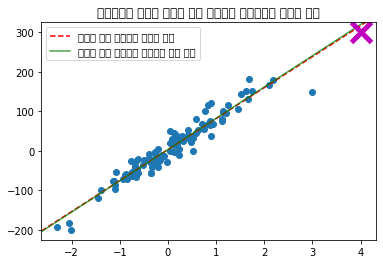

In [14]:
idx = np.array(list(range(100)) + [101])
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                        c="r", linestyle="--", ax=ax)
sm.graphics.abline_plot(model_results=result4,
                        c="g", alpha=0.7, ax=ax)

plt.plot(X0[-2], y[-2], marker='x', c="m", ms=20, mew=5)
plt.legend([u"오차가 작은 데이터를 포함한 경우", u"오차가 작은 데이터를 포함하지 않은 경우"],
           loc="upper left")
plt.title("레버리지는 높지만 오차가 작은 데이터가 회귀분석에 미치는 영향")
plt.show()

### 아웃라이어

모형에서 설명하고 있는 데이터와 동떨어진 값을 가지는 데이터, 즉 잔차가 큰 데이터를 __아웃라이어__ 라고 한다. 그런데 잔차의 크기는 독립 변수의 영향을 받으므로 아웃라이어를 찾으려면 이 영향을 제거한 표준화된 잔차를 계싼해야 한다.

잔차를 레버리지와 잔차의 표준 편차로 나누어 동일한 표준 편차를 가지도록 스케일링한 것을 __표준화 잔차__ 라고 한다

$r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}}$

### Cook's Distance 

회귀 분석에는 잔차의 크기가 큰 데이터가 아웃라이어가 되는데 이 중에서도 주로 관심을 가지는 것은 레버리지와 잔차의 크기가 모두 큰 데이터들이다. 잔차와 레버리지를 동시에 보기위한 기준으로 Cook's Distance 가 있다. 다음과 같이 정의되는 값으로 레버리지가 커지거나 잔치의 크기가 커지면 Cook's Distance 값이 커진다.

$D_i = \frac{r_i^2}{\text{RSS}}\left[\frac{h_{ii}}{(1-h_{ii})^2}\right] $

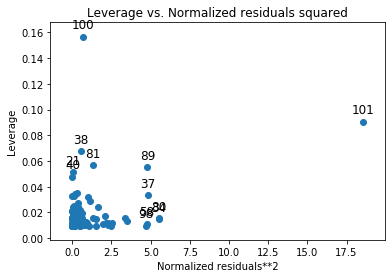

In [16]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

## 4.3 분산 분석과 모형 성능 

### 분산 분석 

선형회귀분석의 겨로가가 얼마나 좋은지는 단순히 잔차제곱합(RSS) 으로 평가할 수 없다. 변수의 단위 즉, 스케일이 달라지면 회귀분석과 상관없이 잔차 제곱합도 달리지기 때문이다.

분산분석(ANOVA) 은 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가하고자 하는 방법이다. 분산 분석은 서로 다른 두 개의 선형회귀분석의 성능 비교에 응용 할 수 있으며 독립변수가 카테고리 변수인 경우 각 카테고리 값에 따른 영향을 정량적으로 분석하는데 사용된다. 
$\bar{y}$ 를 종속변수 $y$의 샘플 평균이라고 하자.

$ \bar{y}=\frac{1}{N}\sum_{i=1}^N y_i $

종속변수 y의 분산을 나타내는 __TSS(total sum of square)__ 라는 값을 정의한다.
__TSS 는 종속변수값의 움직임의 범위를 나타낸다__


$\text{TSS} = \sum_{i=1}^N (y_i-\bar{y})^2 = (y - \bar{y}1_N)^T(y - \bar{y}1_N)$

마찬가지로 회귀 분석에 의해 예측한 값 $\hat{y}$ 의 분산을 나타내는 __ESS__

$\text{ESS}=\sum_{i=1}^N (\hat{y}_i -\bar{\hat{y}})^2 = (\hat{y} - \bar{\hat{y}}1_N)^T(\hat{y} - \bar{\hat{y}}1_N)$

__RSS__

$ \text{RSS}=\sum_{i=1}^N (y_i - \hat{y}_i)^2\ = e^Te $

__ESS 는 모형에서 나온 예측값의 움직임의 범위, RSS는 잔차의 움직임의 범위, 즉 오차의 크기__ 를 뜻한다고 볼수있다

$TSS = ESS + RSS $

### 결정계수 (Coefficient of Determination)

위에서 분산 관계식에서 모형의 성능을 나타내는 결정계수 $R^2$을 정의할 수 있다.

$R^2 \equiv 1 - \dfrac{\text{RSS}}{\text{TSS}}\ = \dfrac{\text{ESS}}{\text{TSS}}\$

### 회귀 분석 F-검정과 분산 분석으 ㅣ관계 

$\dfrac{\text{ESS}}{K-1} \div  \dfrac{\text{RSS}}{N-K} \sim F(K-1, N-K)$

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


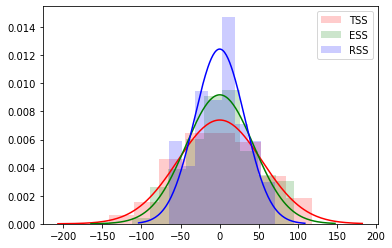

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [24]:
import seaborn as sns
import scipy as sp
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=["X"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)
sns.distplot(y,
             kde=False, fit=sp.stats.norm, hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"},
             label="TSS")
sns.distplot(result.fittedvalues,
             kde=False, hist_kws={"color": "g", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "g"},
             label="ESS")
sns.distplot(result.resid,
             kde=False, hist_kws={"color": "b", "alpha": 0.2}, fit=sp.stats.norm, fit_kws={"color": "b"},
             label="RSS")
plt.legend()
plt.show()
sm.stats.anova_lm(result)

In [25]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Fri, 15 May 2020   Prob (F-statistic):           6.60e-24
Time:                        14:56:56   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

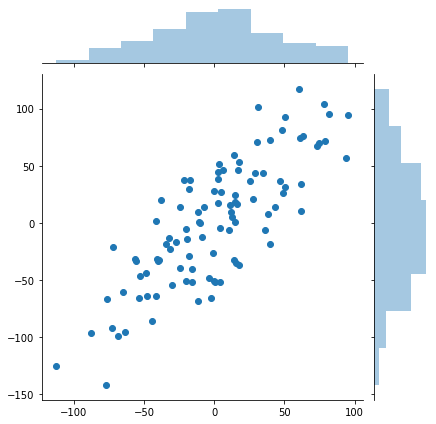

In [26]:
sns.jointplot(result.fittedvalues, y)
plt.show()

 ### 상수항이 없는 모형의 경우
 
 모형에서 상수항을 지정하지 않은 경우에는 결정계수의 정의에 사용되는 TSS의 정의가 다음과 같이 달라진다
 
$\text{TSS} = \sum_i y_i^2 = y^Ty$


상수항이 없는 모형의 경우 -> 원점을 지나는 모델

__상수항이 없는 모형과 상수항이 있는 모형은 직접 비교하면 안된다.__

In [27]:
X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=["X"])
dfy = pd.DataFrame(y, columns=["Y"])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [28]:
result2.rsquared

0.18768724705943896

In [30]:

from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"])
dfX_boston = sm.add_constant(dfX0_boston)
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [31]:
model_full = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
model_reduced = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)

sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

C:\Users\82109\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\82109\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\82109\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


indus 와 age 는 필요없따!

### F 검정을 사용한 변수 중요도 비교

F 검정은 각 독립변수의 중요도를 비교하기 위해 사용할 수 있다. 방법은 전체 모형과 각 변수 하나만을 뺀 모형들의 성능을 비교하는 것이다. 이는 간접적으로 각 독립 변수의 영향력을 측정하는것과 같다.

In [32]:
model_boston = sm.OLS.from_formula(
    "MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2)

,sum_sq,df,F,PR(>F)
CRIM,243.219699,1.0,10.801193,1.086810e-03
ZN,257.492979,1.0,11.435058,7.781097e-04
INDUS,2.516668,1.0,0.111763,7.382881e-01
NOX,487.155674,1.0,21.634196,4.245644e-06
RM,1871.324082,1.0,83.104012,1.979441e-18
AGE,0.061834,1.0,0.002746,9.582293e-01
DIS,1232.412493,1.0,54.730457,6.013491e-13
RAD,479.153926,1.0,21.278844,5.070529e-06
TAX,242.257440,1.0,10.758460,1.111637e-03
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12


수가 작을수록 영향을 많이 끼친다 - LSTAT

### 조정 결정 계수

독립변수를 추가할수록 결정계수의 값은 항상 증가한다.

## 6.1 모형 진단과 수정 

회귀분석 결과의 진단이란 회귀분석에 사용된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지를 확인하는 과정이다.

### 잔차 정규성

데이터가 묘형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다.

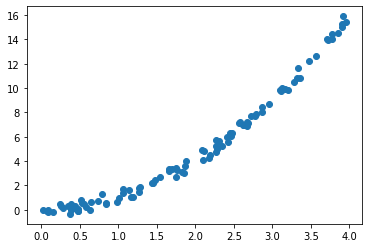

In [33]:
def make_regression2(n_sample=100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

In [34]:
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()

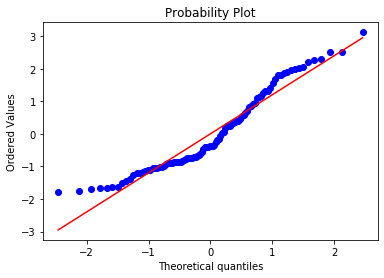

In [35]:
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

In [36]:
test = sm.stats.omni_normtest(result2.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  9.520
P-value     :  0.009


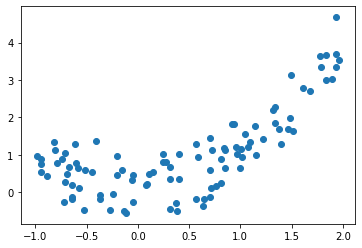

In [37]:
def make_regression3(n_sample=100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y


x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

### 이분산성

선형 회귀 모형에서는 종속 변수 값의 분산이 독립 변수의 값과 상관없이 고정된 값을 가져야한다. 그러나 실제 데이터는 독립 변수 값의 크기가 커지면 종속 변수 값의 분산도 커지는 __이분산성__ 문제가 발생한다. 종속변수를 로그변환한 트랜스로그 모형을 사용하면 이분산성 문제가 해결되는 경우도 있다.

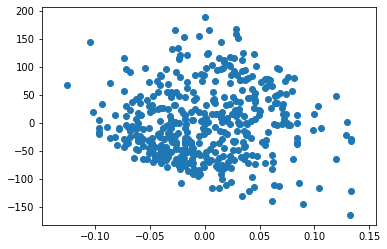

In [38]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.concat([pd.DataFrame(diabetes.data, columns=["x%d" % (i + 1) for i in range(diabetes.data.shape[1])]),
                pd.DataFrame(diabetes.target, columns=["target"])],
               axis=1)
model = sm.OLS.from_formula("target ~ x9", data=df)
result = model.fit()
plt.scatter(df["x9"], result.resid)
plt.show()

### 자기 상관 계수

선형회귀 모형에서는 오차 들이 서로 독립이라고 가정하고 있다.

따라서 잔차도 서로 독립이어야 한다. 만약 서로 독립이 아니라면 선형회귀 모형이 아닌 ARMA 모형 등의 시계열 모형을 사용해야 한다.

오차가 독립인지 검정하는 방법은 잔차를 시계열로 가정하여 자기상관계수를 구하는 것이다.
만약 독립이라면 시차가 0인 경우를 제외하고 자기 상관계수 pl이 0이어야 한다.
이를 검사하는 검증으로는 다음과 같은 것들이 있다
- box-pierce 검정
- ljung-box 검정
- durbin-watson 검정

### 기저함수

이러한 비선형 모형을 만들기 위해서는 데이터에 적합한 비선형 함수를 충분히 많이 생각해 낼 수 있어야 한다. 이러한 고충을 덜기 위해 만들어진 것이 기저함수모형이다.
기저함수는 특정한 규칙에 따라 만들어지는 함수의 열로써 충분히 많은 수의 함수가 있으면 어떤 모양의 함수라도 비슷하게 흉내낼 수 있는 것을 말한다.

기저함수중에서도 서로 다른 두 기저함수의 곱의 정적분 값이 0이 되면 직교기저함수라고 한다. 체비세프 다항식은 직교기저함수의 한 예이다.

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53552 missing from c

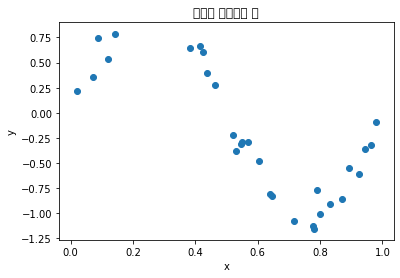

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     36.36
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.69e-06
Time:                        15:50:34   Log-Likelihood:                -15.360
No. Observations:                  30   AIC:                             34.72
Df Residuals:                      28   BIC:                             37.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7140      0.176      4.064      0.0

In [40]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

X, y = make_nonlinear()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("비선형 데이터의 예")
plt.show()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

print(sm.OLS.from_formula("y ~ x", data=df).fit().summary())

### 과최적화

모형을 특정 샘플 데이터에 대해 과도하게 최적화하는 것을 과최적화(overfitting)이라고 한다.

과최적화는

- 독립 변수 데이터 갯수에 비해 모형 모수의 수가 과도하게 크거나
- 독립 변수 데이터가 서로 독립이 아닌 경우에 발생한다.

과최적화가 문제가 되는 이유는 다음과 같다
- 트레이닝에 사용되지 않은 새로운 독립 변수 값을 입력하면 오차가 커진다(cross validation 오차)
- 샘플이 조금만 변화해도 가중치 계수의 값이 크게 달라진다.(추정의 부정확함)

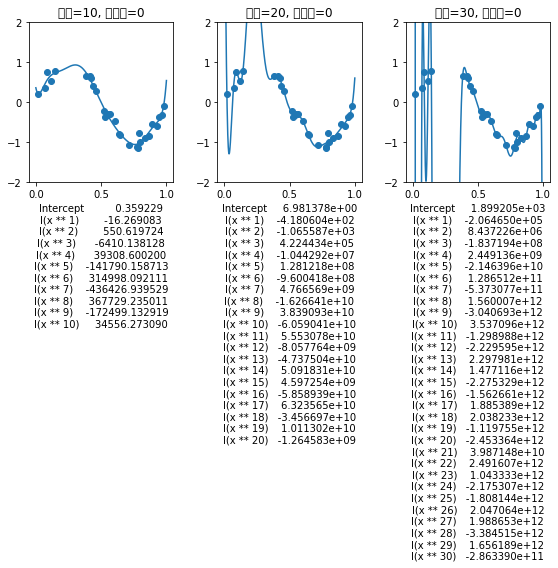

In [43]:
def polyreg(degree, seed=0, ax=None):
    X, y = make_nonlinear(seed)

    dfX = pd.DataFrame(X, columns=["x"])
    dfX = sm.add_constant(dfX)
    dfy = pd.DataFrame(y, columns=["y"])
    df = pd.concat([dfX, dfy], axis=1)

    model_str = "y ~ "
    for i in range(degree):
        if i == 0:
            prefix = ""
        else:
            prefix = " + "
        model_str += prefix + "I(x**{})".format(i + 1)
    model = sm.OLS.from_formula(model_str, data=df)
    result = model.fit()

    if ax:
        ax.scatter(X, y)
        xx = np.linspace(0, 1, 1000)
        dfX_new = pd.DataFrame(xx[:, np.newaxis], columns=["x"])
        ax.plot(xx, result.predict(dfX_new))
        ax.set_ylim(-2, 2)
        ax.set_title("차수={}, 시드값={}".format(degree, seed))
        xlabel = "\n".join(str(result.params).split("\n")[:-1])
        font = {'family': 'NanumGothicCoding', 'color':  'black', 'size': 10}
        ax.set_xlabel(xlabel, fontdict=font)

plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(10, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, ax=ax2)
ax3 = plt.subplot(133)
polyreg(30, ax=ax3)
plt.tight_layout()
plt.show()

또한 데이터가 조금만 달라져도 가중치 값이 크게 달라지는 것도 확인할 수 있다.


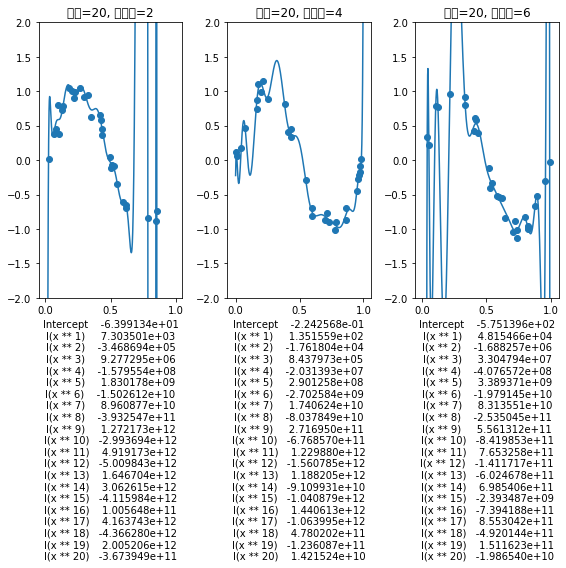

In [44]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(131)
polyreg(20, seed=2, ax=ax1)
ax2 = plt.subplot(132)
polyreg(20, seed=4, ax=ax2)
ax3 = plt.subplot(133)
polyreg(20, seed=6, ax=ax3)
plt.tight_layout()
plt.show()

##  교차검증

### 표본내 성능과 표본외 성능

회귀분석 모형을 만들기 위해서는 모수 추정 즉 학습(trainning)을 위한 데이터 집합이 필요하다. 이 데이터 집합을 학습용 데이터 집합(training data set)이라고 한다. 이 학습 데이터 집합의 종속 변수값을 얼마나 잘 예측하였는지를 나타내는 성능을 __표본내 성능 검증(in sample testing)__ 이라고 한다

그런데 회귀분석 모형을 만드는 목적중 하나는 종속 변수의 값을 아직 알지 못하고 따라서 학습에 사용하지 않은 표본의 대해 종속 변수의 값을 알아내고자 하는 것 즉 예측(prediction)이다. 이렇게 학습에 쓰이지 않는 표본 데이터 집합의 종속 변수 값을 얼마나 잘 예측하는가를 검사하는 것을 __표본외 성능 검증(out-of-sample testing) 혹은 교차검증(validation)__ 이라고 한다

### 과최적화

일반적으로 표본내 성능과 표본외 성능은 비슷한 수준을 보이지만 경우에 따라서는 표본내 성능은 좋으면서 표본외 성능이 상대적으로 많이 떨어지는 수도 있다. 이러한 경우를 __과최적화(overfitting)__ 라고 한다. 과최적화가 발생하면 학습에 쓰였던 표본 데이터에 대해서는 잘 종속 변수의 값을 추정하지만 새로운 데이터를 주었을 때 전혀 예측하지 못하기 때문에 예측 목적으로는 쓸모없는 모형이 된다.

이러한 과최적화가 발생하는 원인과 과최적화를 방지하기 위한 정규화(regularzation)방법

### 검증용 데이터 집합

교차검증을 하려면 두 종류의 데이터 집합이 필요하다.

- 모형 추정 즉 학습을 위한 데이터 집합 ( training data set)
- 성능 검증을 위한 데이터 집합 (test data set)

두 데이터 집합 모두 종속 변수값이 있어야 한다. 따라서 보통은 가지고 있는 데이터 집합을 학습용과 검증용으로 나누어 학습용 데이터만을 사용하여 회귀분석 모형을 만들고 검증용 데이터로는 성능을 계산하는 __학습/검증 데이터분리(train-test split) 방법__ 을 사용한다

In [45]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)

N = len(df)
ratio = 0.7
np.random.seed(0)
idx_train = np.random.choice(np.arange(N), np.int(ratio * N))
idx_test = list(set(np.arange(N)).difference(idx_train))

df_train = df.iloc[idx_train]
df_test = df.iloc[idx_test]

In [46]:
model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     81.31
Date:                Fri, 15 May 2020   Prob (F-statistic):           7.22e-96
Time:                        16:03:01   Log-Likelihood:                -1057.6
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     340   BIC:                             2197.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6105      6.807      5.966      0.0

In [47]:
pred = result.predict(df_test)

rss = ((df_test.MEDV - pred) ** 2).sum()
tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum()
rsquared = 1 - rss / tss
rsquared

0.688373412498711

In [48]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=0)
df_train.shape, df_test.shape

((354, 14), (152, 14))

In [49]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size=0.3, random_state=0)
dfX_train.shape, dfy_train.shape, dfX_test.shape, dfy_test.shape

((354, 13), (354, 1), (152, 13), (152, 1))

### K-폴드 교차검증

데이터의 수가 적은 경우에는 이 데이터 중의 일부인 검증 데이터의 수도 적기 때문에 검증 성능의 신뢰도가 떨어진다. 그렇다고 검증 데이터의 수를 증가시키면 학습용 데이터의 수가 적어지므로 정상적인 학습이 되지 않는다. 이러한 딜레마를 해결하기 위한 검증 방법이 __K-폴드(K-fold)교차검증 방법__ 이다.

K-폴드 교차검증에서는 다음처럼 학습과 검증을 반복한다.

1. 전체 데이터를 K개의 부분집합({D1,D2,...,D_k})으로 나눈다.
2. 데이터를 {D1,D2,...,D_k-1}을 학습용 데이터로 사용하여 회귀분석 모형을 만들고 데이터 D_k로 교차검증을 한다
3. 거 빼고 다시 학습데|이터로 사용후 교차검증 반복


In [54]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]
    
    model = sm.OLS.from_formula("MEDV ~ " + "+".join(boston.feature_names), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.MEDV - pred) ** 2).sum()
    tss = ((df_test.MEDV - df_test.MEDV.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.77301356, 검증 R2 = 0.58922238
학습 R2 = 0.72917058, 검증 R2 = 0.77799144
학습 R2 = 0.74897081, 검증 R2 = 0.66791979
학습 R2 = 0.75658611, 검증 R2 = 0.66801630
학습 R2 = 0.70497483, 검증 R2 = 0.83953317


### 교차 검증 반복

cross_val_score 함수 사용

In [56]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.2'

In [57]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [58]:
c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [59]:
from konlpy.corpus import kobill
kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [60]:
d = kobill.open('1809890.txt').read()
print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [61]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
mecab = Mecab()
okt = Okt()

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

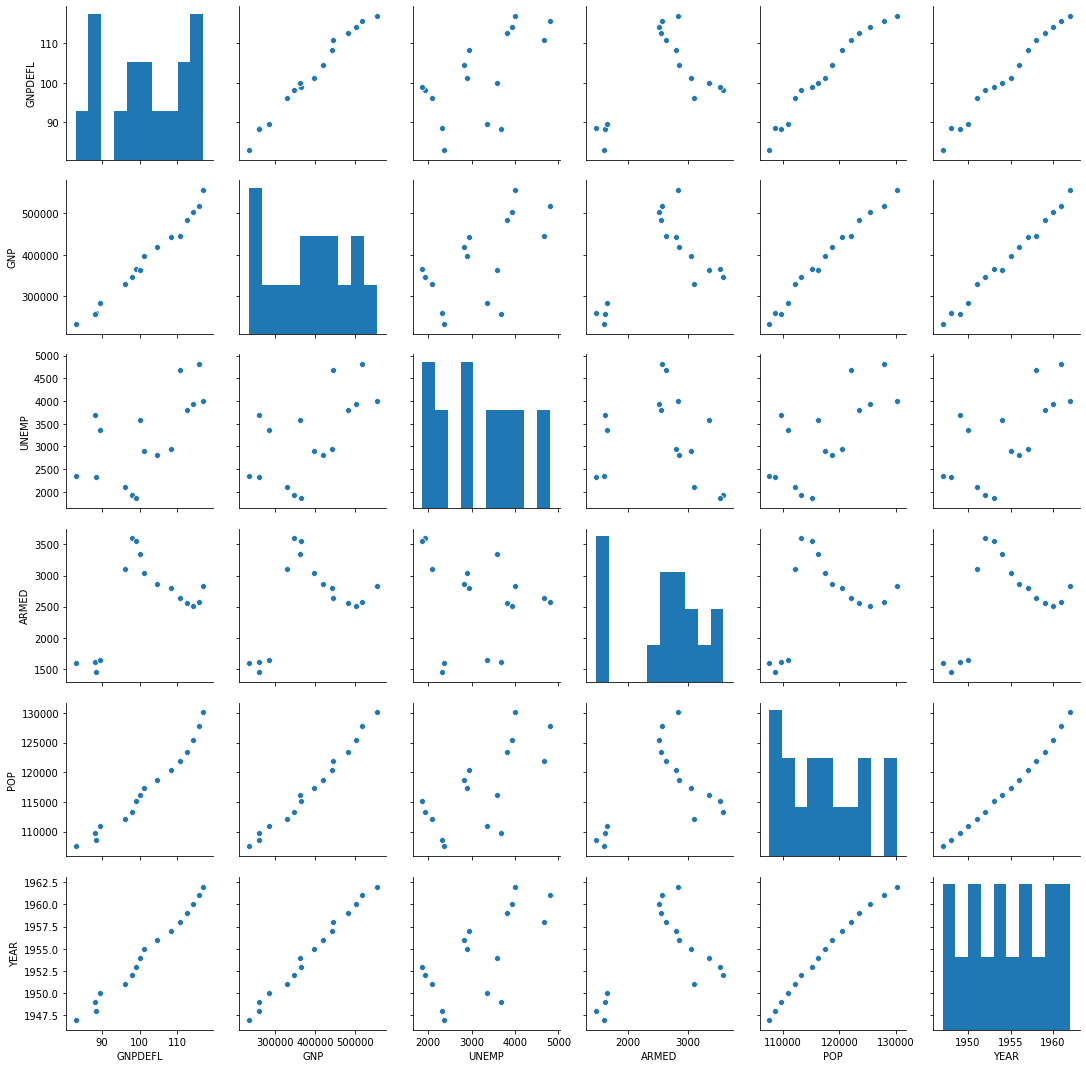

In [62]:
from statsmodels.datasets.longley import load_pandas

dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy, dfX], axis=1)
sns.pairplot(dfX)
plt.show()

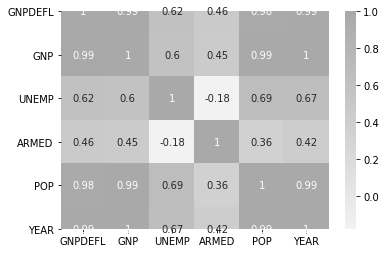

In [63]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, cmap=cmap)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split

def get_model1(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ GNPDEFL + POP + GNP + YEAR + ARMED + UNEMP", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     437.5
Date:                Fri, 15 May 2020   Prob (F-statistic):             0.0366
Time:                        19:38:01   Log-Likelihood:                -44.199
No. Observations:                   8   AIC:                             102.4
Df Residuals:                       1   BIC:                             103.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.235e+07   2.97e+06     -4.165      0.1

In [65]:
def calc_r2(df_test, result):
    target = df.loc[df_test.index].TOTEMP
    predict_test = result.predict(df_test)
    RSS = ((predict_test - target)**2).sum()
    TSS = ((target - target.mean())**2).sum()
    return 1 - RSS / TSS


test1 = []
for i in range(10):
    df_train, df_test, result = get_model1(i)
    test1.append(calc_r2(df_test, result))

test1

[0.9815050656844267,
 0.973849754306501,
 0.9879366370011322,
 0.7588861967876803,
 0.9807206089304095,
 0.8937889315063796,
 0.8798563810571698,
 0.931466577896602,
 0.8608525682213877,
 0.9677198735128874]

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif['features'] = dfX.columns

vif

,VIF Factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


In [68]:
def get_model2(seed):
    df_train, df_test = train_test_split(df, test_size=0.5, random_state=seed)
    model = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result2 = get_model2(3)
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     118.6
Date:                Fri, 15 May 2020   Prob (F-statistic):           0.000231
Time:                        19:44:39   Log-Likelihood:                -57.695
No. Observations:                   8   AIC:                             123.4
Df Residuals:                       4   BIC:                             123.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.538e+04    163.988    398.686   

In [69]:
test2 = []
for i in range(10):
    df_train, df_test, result = get_model2(i)
    test2.append(calc_r2(df_test, result))

test2

[0.9763608388904903,
 0.9841984331185691,
 0.9687069366140135,
 0.939730405320177,
 0.9773357061188462,
 0.9561262155732314,
 0.9803852496698645,
 0.9917361722470804,
 0.9837134067639469,
 0.9789512977093211]

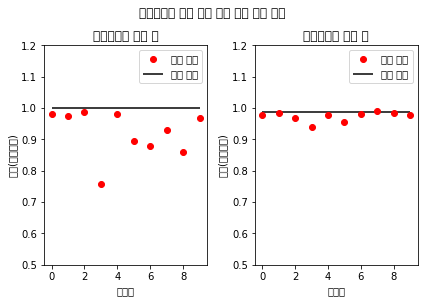

In [70]:
plt.subplot(121)
plt.plot(test1, 'ro', label="검증 성능")
plt.hlines(result1.rsquared, 0, 9, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 전")
plt.ylim(0.5, 1.2)

plt.subplot(122)
plt.plot(test2, 'ro', label="검증 성능")
plt.hlines(result2.rsquared, 0, 9, label="학습 성능")
plt.legend()
plt.xlabel("시드값")
plt.ylabel("성능(결정계수)")
plt.title("다중공선성 제거 후")
plt.ylim(0.5, 1.2)

plt.suptitle("다중공선성 제거 전과 제거 후의 성능 비교", y=1.04)
plt.tight_layout()
plt.show()

In [71]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
    "scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [72]:
idx_outlier = \
    np.array([7,  54, 148, 152, 160, 214, 253, 267, 364, 365, 367, 368, 369,
              371, 372, 374, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410,
              412, 413, 414, 415, 416, 418, 419, 426, 445, 489, 490, 492, 505,
              161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
              370, 371, 372])

idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

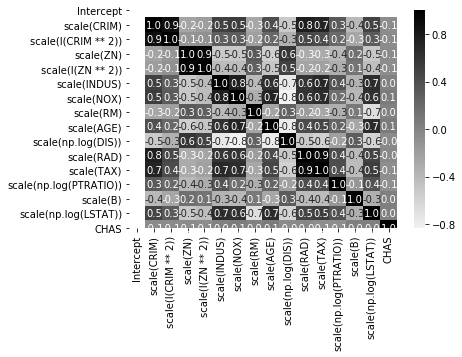

In [73]:
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [74]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.061624,CHAS
1,1.338325,scale(B)
2,1.478553,Intercept
3,1.780320,scale(np.log(PTRATIO))
4,2.596496,scale(RM)
5,3.748931,scale(AGE)
6,3.807459,scale(INDUS)
7,4.682812,scale(np.log(LSTAT))
8,5.071802,scale(NOX)
9,5.215025,scale(np.log(DIS))


In [75]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     199.9
Date:                Fri, 15 May 2020   Prob (F-statistic):          1.56e-185
Time:                        19:47:23   Log-Likelihood:                 317.45
No. Observations:                 456   AIC:                            -602.9
Df Residuals:                     440   BIC:                            -536.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [76]:
cols = ["Intercept", "CHAS", "scale(B)", "scale(CRIM)",
        "scale(np.log(PTRATIO))", "scale(RM)", "scale(np.log(LSTAT))"]

model_boston2 = sm.OLS(np.log(dfy), dfX[cols])

result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     380.7
Date:                Fri, 15 May 2020   Prob (F-statistic):          1.42e-172
Time:                        19:47:51   Log-Likelihood:                 260.52
No. Observations:                 456   AIC:                            -507.0
Df Residuals:                     449   BIC:                            -478.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [82]:
import numpy as np
import random
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2*np.pi*X) + np.random.randn(n_samples) + 0.1
    X = X[:, np.newaxis]
    return (X,y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=['x'])
dfX = sm.add_constant(dfX)
dfy = pd.DataFrame(y, columns=['y'])
df = pd.concat([dfX,dfy], axis=1)

In [83]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept        -1.598935
x               200.835559
I(x ** 2)     -4282.141428
I(x ** 3)     39048.717919
I(x ** 4)   -183477.172764
I(x ** 5)    492818.799796
I(x ** 6)   -789635.076849
I(x ** 7)    747407.218118
I(x ** 8)   -385878.480648
I(x ** 9)     83802.050607
dtype: float64

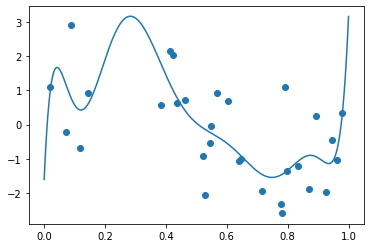

In [85]:
def plot_statsmodels(result):
    plt.scatter(X,y)
    xx = np.linspace(0,1,1000)
    dfxx= pd.DataFrame(xx, columns=['x'])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()
    
plot_statsmodels(result1)

[ 1.04904857 -0.95752045 -1.49692285 -1.18502895 -0.63585021 -0.1048097
  0.33240884  0.66887678  0.9190738   1.10121916]


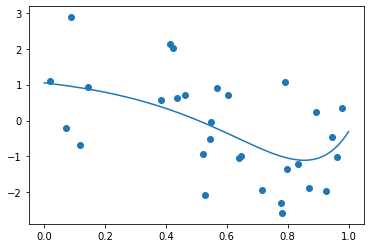

In [86]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

Intercept    1.224460
x           -1.406515
I(x ** 2)   -2.191884
I(x ** 3)   -0.084910
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.530990
I(x ** 9)    1.602998
dtype: float64


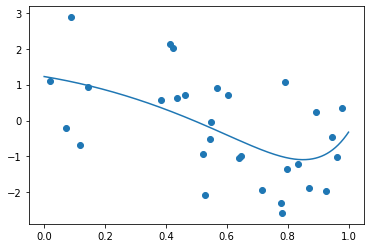

In [90]:
result3 = model.fit_regularized(alpha=0.01 , L1_wt = 1)
print(result3.params)
plot_statsmodels(result3)

Intercept    1.116186
x           -0.999263
I(x ** 2)   -1.939668
I(x ** 3)   -1.052240
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.441925
I(x ** 8)    0.928189
I(x ** 9)    1.195376
dtype: float64


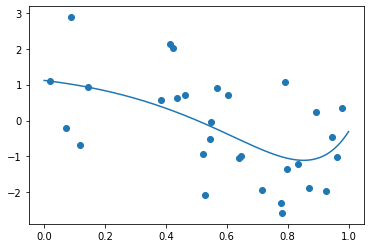

In [91]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result2.params)
plot_statsmodels(result2)

In [92]:
def plot_sklearn(model):
    plt.scatter(X,y)
    xx = np.linspace(0,1,1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show()

[ 0.00000000e+00  2.00835559e+02 -4.28214143e+03  3.90487179e+04
 -1.83477173e+05  4.92818800e+05 -7.89635077e+05  7.47407218e+05
 -3.85878481e+05  8.38020506e+04]


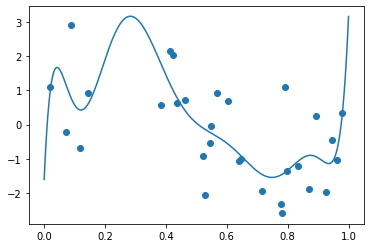

In [93]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

poly = PolynomialFeatures(9)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.          1.87673494 -4.26852392 -3.94912787 -1.41404757  0.71237956
  1.81736333  2.04884995  1.71337906  1.07801367]


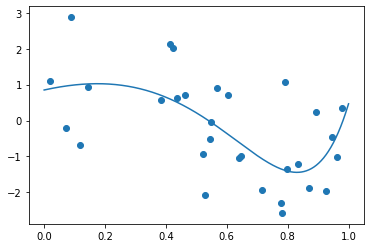

In [95]:
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X,y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

[ 0.         -0.96712364 -1.82802874 -1.18135139 -0.09660767 -0.
  0.          0.44701721  0.92946944  1.27881858]


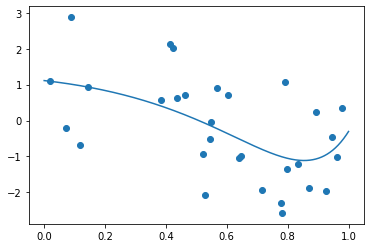

In [96]:
model = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X,y)
print(model.steps[1][1].coef_)
plot_sklearn(model)

#### 정규화 모형의 장점

정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수가 크게 달라지지 않도록 한다.


#### 정규화의 의미

정규화 제한 조건은 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 마찬가지이다. 즉 랏지 회귀 모형은

$ w = \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  \right) $

이라는 최적화 문제에서 다음과 같은 부등식 제한조건을 추가한것과 같다

$\sum_{j=1}^M w_j^2 \leq C$

라그랑지 방법을 사용하면 앞의 부등식 제한조건이 있는 최적화 문제는 다음과 같은 부등식 제한조건이 없는 최적화 문제가 된다.

$\begin{eqnarray}
w 
&=& \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  + \lambda \left( \sum_{j=1}^M w_j^2 - C \right) \right) \\
&=& \text{arg}\min_w \left( \sum_{i=1}^N e_i^2  + \lambda \sum_{j=1}^M w_j^2 - \lambda C \right) \\
\end{eqnarray}$

#### Ridge 모형과 Lasso 모형의 차이

Ridge 모형은 가중치 계수를 한꺼번에 축소시키는데 반해 Lasso 모형은 일부 가중치 계수가 먼저 0으로 수렴하는 특성이 있다.

In [98]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [99]:
alpha = np.logspace(-3,1,5)

data = []

for i , a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X,y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [101]:
alpha = np.logspace(-3,1,5)

data = []

for i , a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X,y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


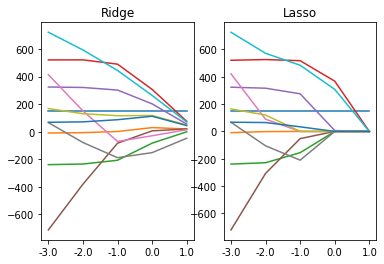

In [102]:
ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show()

### 최적 정규화

정규화에 사용되는 하이퍼 모수 등을 바꾸면 모형의 검증 성능이 달라진다 따라서 최적의 성능을 가져올 수 이쓴ㄴ 정규화 하이퍼 모수를 선택하는 과정이 필요한다 이러한 과정을 최적 정규화(optimal regularization) 라고 한다.

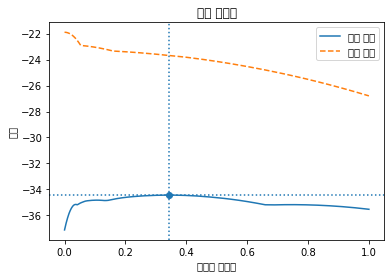

In [103]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

boston = load_boston()
X = boston.data
y = boston.target

alphas = np.logspace(-4, 0, 200)

train_scores = []
test_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    train_score = -mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

plt.plot(alphas, test_scores, "-", label="검증 성능")
plt.plot(alphas, train_scores, "--", label="학습 성능")
plt.axhline(optimal_score, linestyle=':')
plt.axvline(optimal_alpha, linestyle=':')
plt.scatter(optimal_alpha, optimal_score)
plt.title("최적 정규화")
plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.show()

###  검증성능 곡선

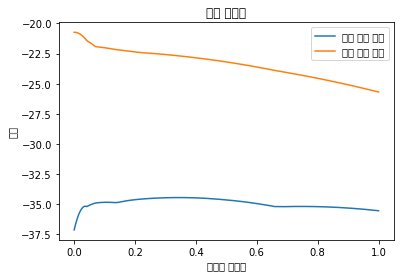

In [105]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(Lasso(), X, y, 'alpha', alphas, cv=5,
                                            scoring='neg_mean_squared_error')

plt.plot(alphas, test_scores.mean(axis=1), '-', label='검증 성능 평균')
plt.plot(alphas, train_scores.mean(axis=1), '-', label='학습 성능 평균')

plt.ylabel('성능')
plt.xlabel('정규화 가중치')
plt.legend()
plt.title('최적 정규화')
plt.show()